# Assignment 1: K-Nearest Neighbor (10 marks)

Student Name: Timothy Holland

Student ID: 697004

## General info

<b>Due date</b>: Friday, 12 August 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:hasti.samadi@unimelb.edu.au">Hasti Samadi</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 10, and make up 10% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>

## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets (Q1). Secondly, you will implement different distance functions (Q2). Thirdly, you will implement one KNN classifier (Q3, Q4) and apply it to the data set using different distance functions and parameter K (Q5). Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels (Q6).




# Question 1: Loading the data (0.5 marks)

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [1]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []

###########################
## YOUR CODE BEGINS HERE
###########################

# Control number for splitting training and test data
test_feature_total = 163

# Split data into header and instances
header = data[0]
instances = data[1:]
# Split labels from header
labels = labels[1:]

for idx, (instance, label) in enumerate(zip(instances, labels), 1):
    # Formatting and sorting instances into training/test features/labels
   
    # Remove leading/trailing white space/new lines
    instance = instance.strip()
    label = label.strip()
    # Split each instance into separate features
    instance = instance.split(",")
    label = label.split(",")
        
    # Sort into training and test data
    if (idx <= test_feature_total):
        # Index controls for identifier feature
        
        train_features.append(instance[1:])
        train_labels.append(label[1])
    else:
        test_features.append(instance[1:])
        test_labels.append(label[1])

###########################
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 163 41
number of train/test features: 24 24


### Question 2: Distance Functions [1.5 marks]

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [2]:
import math


def euclidean_distance(fw1, fw2):
    # insert code here
    
    # Equation: squareroot of sqared sum of differences
    summation = 0    
    if (fw2):
        for f1, f2 in zip(fw1, fw2):
            # Case 1: Euclidean Distance
            
            summation += (float(f1)-float(f2))**2
    else:
        for f1 in fw1:
            # Case 2: Euclidean Norm 
            # See cosine_difference
           
            summation += float(f1)**2
    
    distance = math.sqrt(summation)
        
    return distance


def cosine_distance(fw1, fw2):
    # insert code here
    
    # Elements of equation
    dot_product = 0
    fw1_enorm = 0
    fw2_enorm = 0
    
    # Calculate dot product
    for f1, f2 in zip(fw1, fw2):        
        dot_product += float(f1)*float(f2)
    
    # Calculate Euclidean Norm 
    fw1_enorm = euclidean_distance(fw1, [])
    fw2_enorm = euclidean_distance(fw2, [])
    
    # Compute similarity
    cosine_similarity = dot_product/(fw1_enorm*fw2_enorm)
        
    # Compute difference
    distance = 1 - cosine_similarity
    
    return distance


def chebyshev_distance(fw1, fw2):
    # insert code here
    
    # Control variable
    distance = 0
    
    # Find max of all differences between vectors
    for f1, f2 in zip(fw1, fw2):
        new_distance = abs(float(f1) - float(f2))
        
        if (distance < new_distance):
            distance = new_distance 
        
    return distance


###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))


600.17572
2e-05
600.0


### Question 3: KNN Classifier [2.0 marks]

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [3]:
def KNN(train_features, train_labels, test_features, k, 
        dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################
         
    ### Libraries ###
    import numpy as np
    from collections import Counter
    
    
    ### Inner functions for algorithm ###
    
    
    # Derives list of labels with highest frequency
    # @k_shortes: list of (id, distance, label)
    # Returns list of most common label(s)
    def find_most_common(k_neighbours):
    
        # List for most common labels
        most_common = []
        # Controls for ties
        frequency = 0

        # Simplify list into labels
        for instance in k_neighbours:
            most_common.append(instance[2])
        
        # Order by frequency
        frequencies = Counter(most_common)
        most_common = frequencies.most_common()
        
        # Case 1: list of length 1 is most common
        if (len(most_common) == 1):
            return most_common
        
        # Case 2: checking for ties in frequency 
        for idx, element in enumerate(most_common):
            if (idx == 0):
                # Assigning highest frequency
                frequency = element[1]
                
            else:
                if (element[1] < frequency):
                    # Found element without highest frequency
                    # Return list up to this index
                    return most_common[:idx]
        
        # Case 3: all labels the same
        return most_common
    
    
    # Predicts test instance label using majority voting on k closest labels
    # @k_neighbours: list of (id, distance, label)
    # Returns label prediction as string
    def majority_voting(k_neighbours):
        
        # Final prediction after tiebreaks
        test_prediction = ''
        # Most common labels
        common_labels = find_most_common(k_neighbours)        
        # Handles distance ties
        distance = None
        # Designated label
        prediction_ties = []
        
        # Handle prediction ties
        if (len(common_labels) == 1):
            # Case 1: no frequency tie  
            test_prediction = common_labels[0][0]
            
        else:
            # Case 2: frequency tie
            # Find label with lowest distance           
            for shorty in k_neighbours:
                for common in common_labels:
                    # Matching label
                    if ((common[0] == shorty[2])):
                        
                        if (not distance):
                            # Assigning shortest
                            distance = shorty[1]
                            prediction_ties.append(shorty)
                            
                        elif (shorty[1] == distance):
                            # Distance AND frequency tie
                            prediction_ties.append(shorty)
            
            # Case 3: handle distance and frequency tie
            # Sorts by identifier
            if (len(prediction_ties) > 1):
                prediction_ties.sort(key=lambda x:x[0])
            
            # Assign prediction
            test_prediction = prediction_ties[0][2]
        
        return test_prediction
    
    
    # Predicts test instance label using weighted inverse voting on k closest labels
    # @k_neighbours: list of (id, distance, label)
    # Returns label prediction as string
    def weighted_voting(k_neighbours):
        
        # Dictionary for accumulating weighted votes
        votes = dict()
        # List for sorting dictionary
        sorted_votes = []
        # Control variable for weights
        weight = 0
        
        
        # Returns weight given distance
        # @distance: distance to be weighted
        def get_weight(distance):
            return (1/(distance+math.e))
        
        
        # Amass weights from k shortest labels
        for instance in k_neighbours:
            # Instance values
            identifier = instance[0]
            new_weight = get_weight(instance[1])
            label = instance[2]
            
            if (label not in votes.keys()):
                # Inserts non-existing label in dictionary
                # (Key: pair) = (Label: [distance, identifier])
                weight = new_weight
                votes[label] = (weight, identifier)
                
            elif (label in votes.keys()):
                # Updates existing label in dictionary                
                weight = votes[label][0]
                old_identifier = votes[label][1]
                weight += new_weight
                
                if (identifier < old_identifier):
                    # Insert new identifier if lower
                    # Used for distance ties later
                    votes[label] = (weight, identifier)
                    
                else:
                    votes[label] = (weight, old_identifier)
            
        # Sort weighted votes in descending order
        sorted_votes = sorted(votes.items(), key=lambda item: item[1][0], reverse=True)

        # Case: ties in weighted distance. Choose smallest matching identifier.
        if ((len(sorted_votes) > 1) and (sorted_votes[0][1][0] == sorted_votes[1][1][0])):
            # Greatest weight
            heaviest = sorted_votes[0][1][0]
            
            # Find all ties
            for idx, instance in enumerate(sorted_votes):
                instance_weight = instance[1][0]
                
                if (instance_weight < heaviest):
                    # Found ties, break loop
                    sorted_votes = sorted_votes[:idx]
                    break
            
            # Sort via identifier
            sorted_votes.sort(key=lambda x:x[1][1])
        
        # Assigne predicted label
        test_instance = sorted_votes[0][0]
                
        return test_instance
  

    ### End of Inner Functions ###
    
    ### Find test predictions given training data ###

    for test in test_features:
        # Loop over test instances
        # Find distance to training instances given distance function
        # Retain K closest neighbours
        # Apply voting function (majority = False, weighted = True) for prediction
        
        # K closest neighbours
        k_neighbours = []
        # Labels of neighbours kept for ease
        k_labels = []
        # Final prediction
        test_prediction = ''
        
        for idx, trainer in enumerate(train_features):
            # Loop over training instances
            
            # Proximity of neighbour
            distance = dist_fun(test, trainer)
            
            if (len(k_neighbours) < k):
                # K_neighbours unfilled
                # Add test distance and identifier
                # Sort by distance
                k_neighbours.append([idx, distance, train_labels[idx]])
                k_neighbours.sort(key=lambda x:x[1])
                
            else:                
                # K_neighbours filled
                # Replace test distance if closer
                # Note - handles distance ties implicitly:
                #     If new distance equals end of list
                #     Ignore because higher identifier 
                if (distance < k_neighbours[k-1][1]):
                    # Pop furtherest, append, and sort
                    k_neighbours.pop()
                    k_neighbours.append([idx, distance, train_labels[idx]])
                    k_neighbours.sort(key=lambda x:x[1])

        # Apply voting function to derive prediction
        if (weighted):
            # Weighted Voting
            test_prediction = weighted_voting(k_neighbours)
            
        else:
            # Majority Voting 
            test_prediction = majority_voting(k_neighbours)
        
        # Assign prediction for test instance
        predictions.append(test_prediction)
    
    ###########################
    ## Your answer ENDS HERE
    ###########################
    
    return predictions

### Question 4: Weighted KNN Classifier [1.0 mark]

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

### Question 5: Applying your KNN classifiers to the Car Dataset [0.5 marks]

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [4]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################

# Experiments

# KNN, euclidean distance, majority vote
knn_euc_1 = KNN(train_features, train_labels, test_features, 1, 
                        euclidean_distance, False)
knn_euc_5 = KNN(train_features, train_labels, test_features, 5, 
                        euclidean_distance, False)
knn_euc_20 = KNN(train_features, train_labels, test_features, 20, 
                        euclidean_distance, False)
 
# KNN, euclidean distance, weighted vote
knn_euc_1_w = KNN(train_features, train_labels, test_features, 1, 
                        euclidean_distance, True)
knn_euc_5_w = KNN(train_features, train_labels, test_features, 5, 
                        euclidean_distance, True)
knn_euc_20_w = KNN(train_features, train_labels, test_features, 20, 
                        euclidean_distance, True)

# KNN, cosine distance, majority vote
knn_cos_1 = KNN(train_features, train_labels, test_features, 1, 
                        cosine_distance, False)
knn_cos_5 =  KNN(train_features, train_labels, test_features, 5, 
                        cosine_distance, False)
knn_cos_20 = KNN(train_features, train_labels, test_features, 20, 
                        cosine_distance, False)

# KNN, cosine distance, weighted vote
knn_cos_1_w = KNN(train_features, train_labels, test_features, 1, 
                        cosine_distance, True)
knn_cos_5_w =  KNN(train_features, train_labels, test_features, 5, 
                        cosine_distance, True)
knn_cos_20_w = KNN(train_features, train_labels, test_features, 20, 
                        cosine_distance, True)

# KNN, chebyshev distance, majority vote
knn_che_1 = KNN(train_features, train_labels, test_features, 1, 
                        chebyshev_distance, False)
knn_che_5 = KNN(train_features, train_labels, test_features, 5, 
                        chebyshev_distance, False)
knn_che_20 = KNN(train_features, train_labels, test_features, 20, 
                        chebyshev_distance, False)
 
# KKN, chebyshev distance, weighted vote
knn_che_1_w = KNN(train_features, train_labels, test_features, 1, 
                        chebyshev_distance, True)
knn_che_5_w = KNN(train_features, train_labels, test_features, 5, 
                        chebyshev_distance, True)
knn_che_20_w = KNN(train_features, train_labels, test_features, 20, 
                        chebyshev_distance, True)

# Accuracy of experiments
accuracy_knn_euc_1 = accuracy_score(test_labels, knn_euc_1)
accuracy_knn_euc_5 = accuracy_score(test_labels, knn_euc_5)
accuracy_knn_euc_20 = accuracy_score(test_labels, knn_euc_20)
 
accuracy_knn_euc_1_w = accuracy_score(test_labels, knn_euc_1_w)
accuracy_knn_euc_5_w = accuracy_score(test_labels, knn_euc_5_w)
accuracy_knn_euc_20_w = accuracy_score(test_labels, knn_euc_20_w)

accuracy_knn_cos_1 = accuracy_score(test_labels, knn_cos_1)
accuracy_knn_cos_5 =  accuracy_score(test_labels, knn_cos_5)
accuracy_knn_cos_20 = accuracy_score(test_labels, knn_cos_20)

accuracy_knn_cos_1_w = accuracy_score(test_labels, knn_cos_1_w)
accuracy_knn_cos_5_w =  accuracy_score(test_labels, knn_cos_5_w)
accuracy_knn_cos_20_w = accuracy_score(test_labels, knn_cos_20_w)

accuracy_knn_che_1 = accuracy_score(test_labels, knn_che_1)
accuracy_knn_che_5 = accuracy_score(test_labels, knn_che_5)
accuracy_knn_che_20 = accuracy_score(test_labels, knn_che_20)
 
accuracy_knn_che_1_w = accuracy_score(test_labels, knn_che_1_w)
accuracy_knn_che_5_w = accuracy_score(test_labels, knn_che_5_w)
accuracy_knn_che_20_w = accuracy_score(test_labels, knn_che_20_w)

########################
# Your code ENDS HERE
########################

print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))


Results on the *full* feature set

euclidean (majority vote)
K=1 0.756
K=5 0.707
K=20 0.634
-----------
euclidean (weighted)
K=1 0.756
K=5 0.683
K=20 0.732

cosine (majority vote)
K=1 0.805
K=5 0.707
K=20 0.659
-----------
cosine (weighted)
K=1 0.805
K=5 0.707
K=20 0.659

chebyshev (majority vote)
K=1 0.683
K=5 0.634
K=20 0.561
-----------
chebyshev (weighted)
K=1 0.683
K=5 0.683
K=20 0.707


### Question 6: Analysis [4.5 marks]

1. Consider the following features: make, fuel-type, body-style, and num-of-doors. Assume we intend to use KNN with euclidean distance, for each of the above features, would you change the approach we chose to convert nominal to numeric features? If yes, explain what approach you would select and discuss one benefit and one drawback of your proposed approach.**[0.75 marks]** 

    
2. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] **[1 mark]**
    
    (b) Which feature set is more informative in the context of this classification task and why?**[0.5 marks]**
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?**[0.25 marks]**
    
    
3. Discuss the appropriateness of each of the distance functions for our *car* data set. Where appropriate, explain why you expect them to perform poorly referring to both their mathematical properties and the given feature set. **[0.75 marks]**

    

4. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). **[0.75 mark]**



5. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? **[0.5 marks]**

 

<b>Each question should be answered in no more than 3-4 sentences.</b>




1 The chosen approach for these features assigns a new integer for each category. The problem with this is some feature values, say 'volvo' for make, take on a much higher numeric value than others, say alfa-romeo (22 compared with 1). Here, 'alfa-romeo' is arbitrarily 'further' away than say 'jaguar', thus skewing distance metrics like Euclidean distance. Instead, I would choose one-hot-encoding. The benefit being, for each of these features each value becomes the same distance apart removing the artificial difference. The drawback of one-hot-encoding is that we increase dimensionality, potentially (for categorical features with a large number of values) making the distance between values meaningless. 

2

*Type code for 2.(a) in the cell below, and answer 2.(b) and 2.(c) below*

2b) The feature set (curb-weight, engine-size) is more informative. Why? The two are correlated in terms of how they map onto our instance labels; smaller curb-weight and engine size indicates car is mainly cheap (red) whereas greater curb-weight and engine-size indicates the car is very expensive (green). Whilst the other set (compression-ratio, peak-rpm) lacks any observable correlation in relation to our class labels (just a mix of colours). For our classification task, we want to understand the correlation between features which lead to reliable predictions of classes, the first feature set actually helps us in making a prediction.

2c) Again, in the first feature set, the two features are quite strongly correlated with an evident gradient of colours. I came to this conclusion because cheap cars mainly have a smaller curb-weight and engine size (reds), whilst very expensive cars larger values (greens), with affordable (purple) and expensive (green) in the middle. The second set mainly reveals that most cars (regardless of class) have a small compression ratio regardless of their peak rpm. Indeed, cars with higher compression ratio seem to be more of an outlier in the context of our data. I came to this conclusion because most of the instances sit in the bottom left quadrant. Besides that, the second set doesn't reveal much about our classes.

3 Euclidean distance is perhaps not the best measure (though second best performing here) due to the larger dimensionality of our feature vectors (n=24) which works increasingly contrary to our three dimensional intuitions. Moreover because it takes the difference between features, and we haven't normalised our data, those with greater magnitude (like Peak RPM) have likely skewed our distance result, and in this task, feature discrepency (via magnitude) isn't desired. Whereas Cosine seems to have performed the best, for it naturally normalises data. Indeed, because Cosine works with the difference in angle as opposed to length, it can and does perform better in higher dimensions. Lastly, our Chebyshev distance function has performed the worst  because its difference hinges on the greatest of differences between two feature vectors. The consequence is an even greater skew than our Euclidean measure towards features with higher magnitudes.

4 On the whole, our weighted functions do better for higher values of k. Why? Our dataset is dependent on a large number of 'cheap' and 'affordable' labels, with 'expensive' and 'very expesnive' cars being in the minority. KNN=1 performs well because it can find this small fraction of the dataset. But without weights for higher k, too many neighbours get a say skewing the prediction away from 'expensive' and 'very expensive'. With weights, the proximity of the smaller subset (expensive, very expensive) gets a greater boost, thus producing greater accuracy. Having said this, despite the normalisation of all distances in weighted voting, the Euclidean and Chebyshev distance measures still remain beholden to the non-normalisation of their feature space in the initial distance calculation; features with higher magnitude skew the data. Thus, their result is still hampered. Notably, Cosine distance remains unchanged, the smallest distances [0:1] would create non-normalised weights, placing emphasis on the very closest neighbours, which is again, an important property for correctly predicting the smaller subset (expensive, very expensive).

5 Our accuracy metric is an appropriate evaluation of the car data set because we are conducting supervised machine learning, whereby the success of the model can be evaluated from its ability to predict other labelled instances. Moreover, because our classes are categorical and within a small range (just four classes), using an alternative evaluation method, say the degree of error for false predictions, would likely be trivial. If our classes were real valued, and we were conducting a regression, then perhaps we would want to use such an evaluation technique.   

Text(0, 0.5, 'Peak RPM')

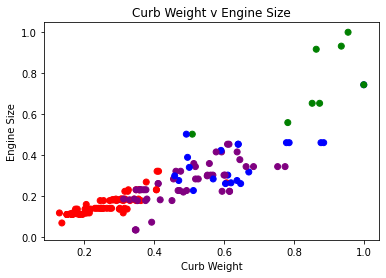

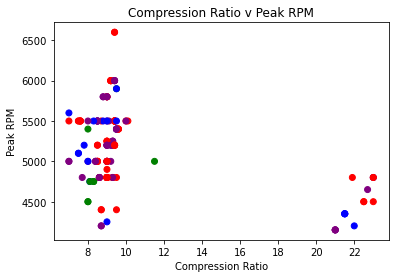

In [5]:
import matplotlib.pyplot as plt

################################################
# Your answer to Question 6 (2) STARTS HERE
################################################

import pandas as pd

# Indexes take into account lack of feature identifier
# Curb weight is 13th
curb_weight_idx = 12
curb_weight = []
# Engine size is 16th
eng_size_idx = 15
eng_size = []
# Compression ratio is 20th
comp_rat_idx = 19
comp_rat = []
# Peak rpm is 22nd
peak_rpm_idx = 21
peak_rpm = []
# For colour map
colourmap = {'cheap':'red', 'affordable':'purple', 'expensive':'blue', 'very expensive':'green'}

for feature in train_features:
    # Rebuild features
    curb_weight.append(float(feature[curb_weight_idx]))
    eng_size.append(float(feature[eng_size_idx]))
    comp_rat.append(float(feature[comp_rat_idx]))
    peak_rpm.append(float(feature[peak_rpm_idx]))

### First Scatter Plot
fig, ax = plt.subplots()
scatter1 = pd.DataFrame(dict(curb_weight=curb_weight, eng_size=eng_size, train_labels=train_labels))
ax.scatter(scatter1['curb_weight'], scatter1['eng_size'], c=scatter1['train_labels'].map(colourmap))
ax.set_title('Curb Weight v Engine Size')
ax.set_xlabel('Curb Weight')
ax.set_ylabel('Engine Size')

### Second Scatter Plot
fig2, ax2 = plt.subplots()
scatter2 = pd.DataFrame(dict(comp_rat=comp_rat, peak_rpm=peak_rpm, train_labels=train_labels))
ax2.scatter(scatter2['comp_rat'],scatter2['peak_rpm'], c=scatter2['train_labels'].map(colourmap))
ax2.set_title('Compression Ratio v Peak RPM')
ax2.set_xlabel('Compression Ratio')
ax2.set_ylabel('Peak RPM')

################################################
# Your answer to Question 6 (2) ENDS HERE
################################################


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Timothy Holland
   
   <b>Dated</b>: 12/08/2022